In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
popular_df = pd.read_csv("Popular.csv")
less_popular_df = pd.read_csv("Less Popular.csv")
both = pd.concat([popular_df, less_popular_df])


,Website Name,Website Popularity,Error,Number of Errors
0,adobe,56,3.3.2 Labels or Instructions,1
1,adobe,56,1.3.5 Identify Input Purpose,1
2,adobe,56,Additional Elements 02,1
3,amazon,30,Additional Elements 04,1
4,amazon,30,Input Fields 04,1
...,...,...,...,...
161,zebraathletics,4458003,Input Fields 04,1
162,zebraathletics,4458003,REG_FILLED_WRONG_FIELD,1
163,zeslecp,4479731,3.3.4 Redundant Entry,1
164,zeslecp,4479731,Additional Elements 04,1


In [25]:


grouped_df = both.groupby("Website Name").size().reset_index(name="Number of Errors")
merged_df = pd.merge(grouped_df, both[["Website Name", "Website Popularity"]].drop_duplicates(), on="Website Name")

correlation = merged_df["Number of Errors"].corr(merged_df["Website Popularity"], method="pearson")
print("Correlation coefficient:", correlation)



Correlation coefficient: 0.4498050846729376


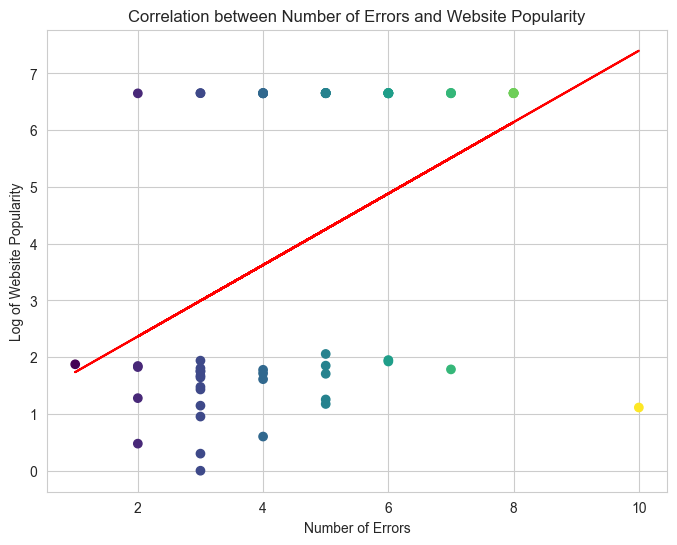

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_df["Number of Errors"], np.log10(merged_df["Website Popularity"]), c=merged_df["Number of Errors"], cmap='viridis')
plt.xlabel("Number of Errors")
plt.ylabel("Log of Website Popularity")
plt.title("Number of Errors and Website Popularity Correlation")

m, b = np.polyfit(merged_df["Number of Errors"], np.log10(merged_df["Website Popularity"]), 1)
plt.plot(merged_df["Number of Errors"], m * merged_df["Number of Errors"] + b, color="red")

# Display the plot
plt.grid(True)
plt.show()